In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload

import pricey as pr
import yfinance as yf
import pandas as pd
from sklearn.decomposition import PCA, KernelPCA, FastICA

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
assets = {
    'ACWI':      'ACWI',        # 주식시장
    'SPY':       'SPX',         # 미국주식
    'QQQ':       'NASDAQ',      # 미국나스닥
    '102110.KS': 'KSP2',        # 한국주식
    'EWJ':       'JP',          # 일본주식
    'MCHI':      'CN',          # 중국주식
    'IEV':       'EU',          # 유럽주식
    'INDA':      'INDIA',       # 인도주식
    'EFA':       'DEVELOPED',   # 선진국주식
    'EEM':       'EM',          # 이머징주식
    'AAXJ':      'AAXJ',        # 아시아(일본제외)
    'BKF':       'BRIC',        # 브릭스
    'FM':        'FRONTIER',    # 프론티어
    'ILF':       'LATAM',       # 남미
    'GULF':      'MIDEAST',     # 중동아시아
    'GWX':       'SMALLCAP',    # 글로벌중소형주(미국제외)
    
    'AGG':       'USAGG',       # 미국종합채
    'SHY':       'UST-SHORT',   # 미국단기채
    'IEF':       'UST-MID',     # 미국중기채
    'TLT':       'UST-LONG',    # 미국장기채
    'TIP':       'USTIP',       # 미국물가채
    'LQD':       'USIG',        # 미국투자등급채
    'HYG':       'USHY',        # 미국하이일드
    'MBB':       'USMBS',       # 미국MBS
    'BKLN':      'USBKLN',      # 미국뱅크론
    'CWB':       'USCB',        # 미국CB
    'PFF':       'USPFF',       # 미국우선주
    'EMB':       'EMB',         # 이머징채권
    '148070.KS': 'KTB-MID',     # 한국중기채
    
    'DBC':       'COMDTY',      # 원자재
    'USO':       'WTI',         # WTI
    'GLD':       'GOLD',        # 금
    'SLV':       'SILVER',      # 은
    'DBA':       'AGRI',        # 농산물
    'UNG':       'GAS',         # 천연가스
    'DBE':       'ENERGY',      # 에너지
    'DBB':       'BASEMETAL',   # 철강
    'GLTR':      'PRECMETAL',   # 귀금속
    
    'UUP':       'USD',         # 달러
    'FXY':       'JPY',         # 엔화
    'FXE':       'EUR',         # 유로화
    'FXA':       'AUD',         # 호주달러 
    'KRW=X':     'USDKRW',      # 원달러
    
    'VNQ':       'US-REIT',     # 미국리츠
    'REM':       'US-MREIT',    # 미국모기지리츠
    
    '^VIX':       'VIX',         # 변동성
}

In [4]:
symbols = ' '.join(assets.keys())
start = '2004-12-20'
end = '2020-06-20'
db = yf.download(symbols, start=start, end=end, threads=True)['Adj Close']
db = db.rename(columns=assets).fillna(method='ffill')

[*********************100%***********************]  46 of 46 completed


In [5]:
def rebuild(base_symbol, pkl_symbol, pkl='prices_global.pkl'):
    market = db[base_symbol]
    support = pd.read_pickle(pkl).reprice.unstack()[pkl_symbol].loc[market.index[0]:]
    df_r = pd.DataFrame({'support':support, 'market':market}).fillna(method='ffill').pct_change()
    df_p = (df_r.market.combine_first(df_r.support).fillna(0) + 1).cumprod()
    return df_p / df_p[-1] * market[-1]

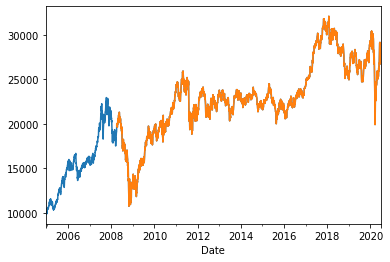

In [139]:
rebuild('KSP2', 'tiger200', pkl='prices_kr.pkl').plot()
db['KSP2'].plot()

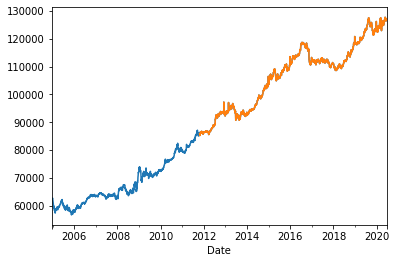

In [140]:
rebuild('KTB-MID', 'kosef_ktb10y', pkl='prices_kr.pkl').plot()
db['KTB-MID'].plot()

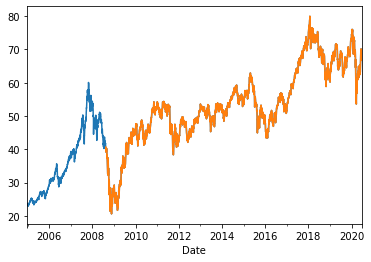

In [141]:
rebuild('AAXJ', 'aaxj_ishares_asia_xjp', pkl='prices_global.pkl').plot()
db['AAXJ'].plot()

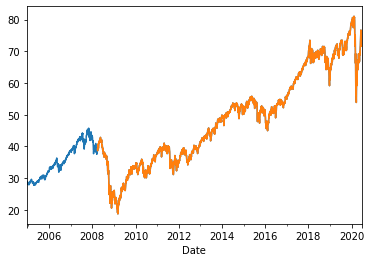

In [142]:
rebuild('ACWI', 'acwi_ishares_acwi', pkl='prices_global.pkl').plot()
db['ACWI'].plot()

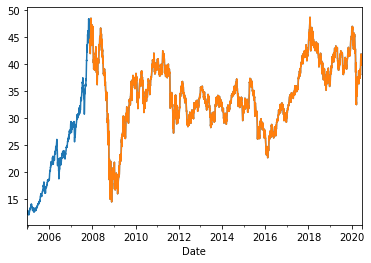

In [143]:
rebuild('BRIC', 'bkf_ishares_bric', pkl='prices_global.pkl').plot()
db['BRIC'].plot()

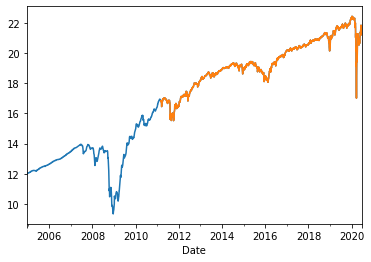

In [144]:
rebuild('USBKLN', 'bkln_pshares_us_bankloan', pkl='prices_global.pkl').plot()
db['USBKLN'].plot()

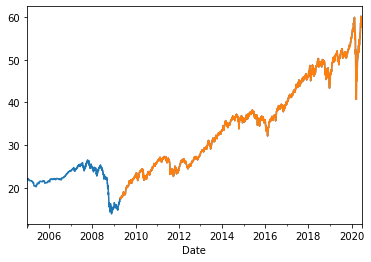

In [145]:
rebuild('USCB', 'cwb_spdr_us_cb', pkl='prices_global.pkl').plot()
db['USCB'].plot()

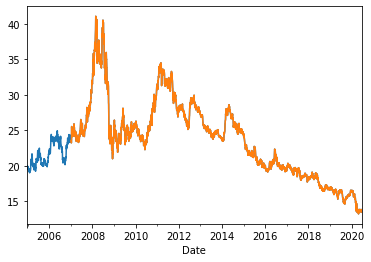

In [146]:
rebuild('AGRI', 'dba_pshares_agriculture', pkl='prices_global.pkl').plot()
db['AGRI'].plot()

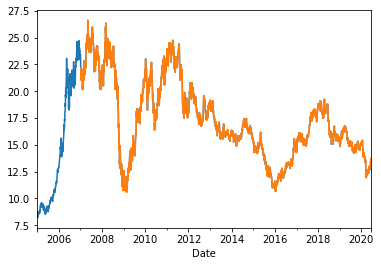

In [147]:
rebuild('BASEMETAL', 'dbb_pshares_bmetal', pkl='prices_global.pkl').plot()
db['BASEMETAL'].plot()

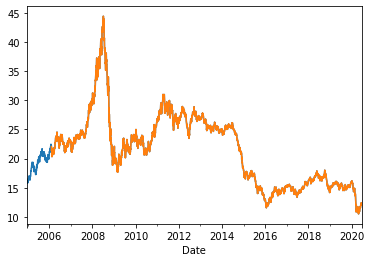

In [148]:
rebuild('COMDTY', 'dbc_pshares_comdty', pkl='prices_global.pkl').plot()
db['COMDTY'].plot()

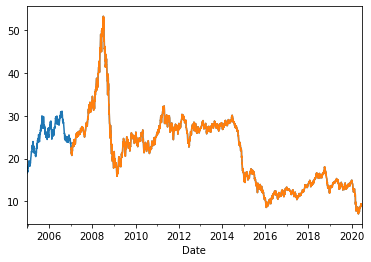

In [149]:
rebuild('ENERGY', 'dbe_pshares_energy', pkl='prices_global.pkl').plot()
db['ENERGY'].plot()

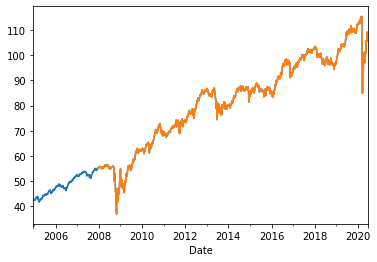

In [150]:
rebuild('EMB', 'emb_ishares_em_sov_usd', pkl='prices_global.pkl').plot()
db['EMB'].plot()

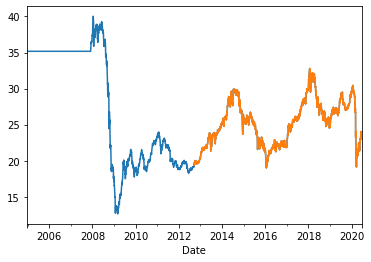

In [151]:
rebuild('FRONTIER', 'fm_ishares_frontier', pkl='prices_global.pkl').plot()
db['FRONTIER'].plot()

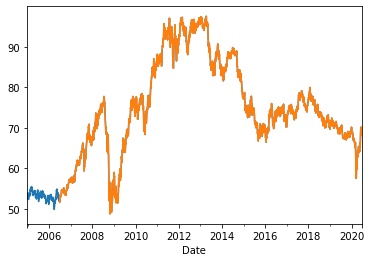

In [152]:
rebuild('AUD', 'fxa_cshares_aud', pkl='prices_global.pkl').plot()
db['AUD'].plot()

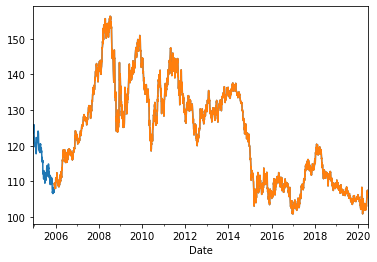

In [153]:
rebuild('EUR', 'fxe_cshares_eur', pkl='prices_global.pkl').plot()
db['EUR'].plot()

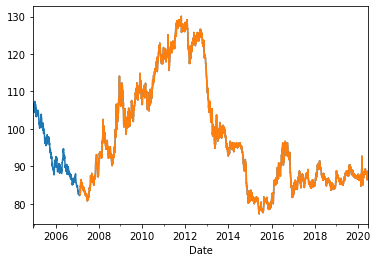

In [154]:
rebuild('JPY', 'fxy_cshares_jpy', pkl='prices_global.pkl').plot()
db['JPY'].plot()

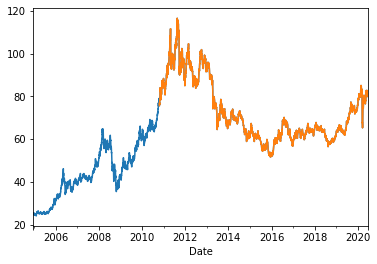

In [155]:
rebuild('PRECMETAL', 'gltr_etfs_pmetal', pkl='prices_global.pkl').plot()
db['PRECMETAL'].plot()

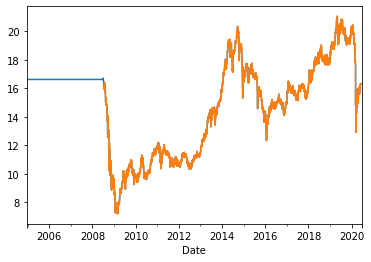

In [156]:
rebuild('MIDEAST', 'gulf_wisdomtree_middle_east', pkl='prices_global.pkl').plot()
db['MIDEAST'].plot()

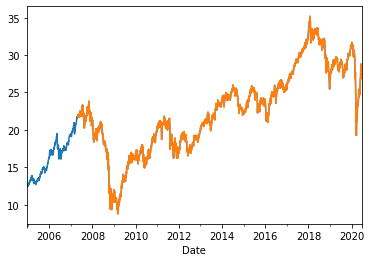

In [157]:
rebuild('SMALLCAP', 'gwx_spdr_intl_smallcap', pkl='prices_global.pkl').plot()
db['SMALLCAP'].plot()

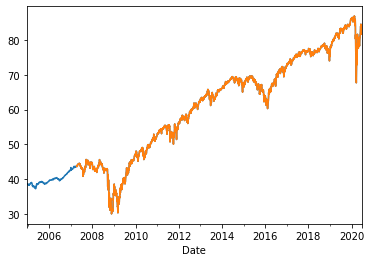

In [158]:
rebuild('USHY', 'hyg_ishares_us_hy', pkl='prices_global.pkl').plot()
db['USHY'].plot()

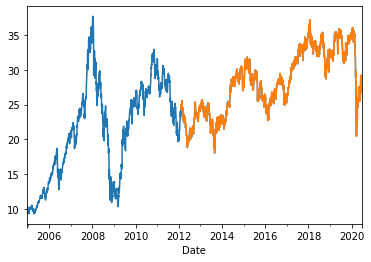

In [159]:
rebuild('INDIA', 'inda_ishares_india', pkl='prices_global.pkl').plot()
db['INDIA'].plot()

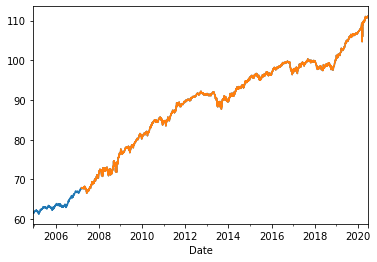

In [160]:
rebuild('USMBS', 'mbb_ishares_us_mbs', pkl='prices_global.pkl').plot()
db['USMBS'].plot()

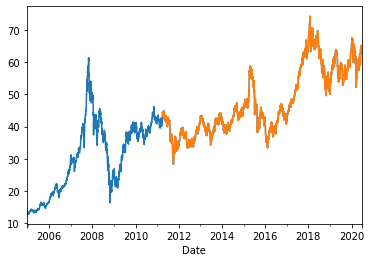

In [161]:
rebuild('CN', 'mchi_ishares_china', pkl='prices_global.pkl').plot()
db['CN'].plot()

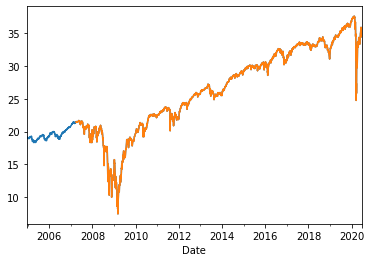

In [162]:
rebuild('USPFF', 'pff_ishares_us_pref', pkl='prices_global.pkl').plot()
db['USPFF'].plot()

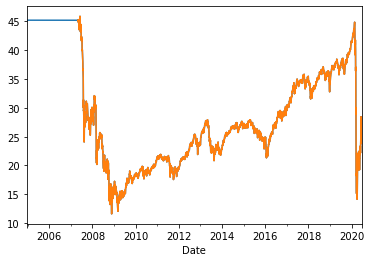

In [163]:
rebuild('US-MREIT', 'rem_ishares_us_mortgage_reit', pkl='prices_global.pkl').plot()
db['US-MREIT'].plot()

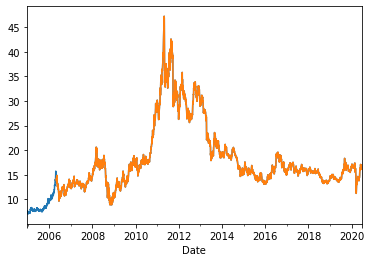

In [164]:
rebuild('SILVER', 'slv_ishares_silver', pkl='prices_global.pkl').plot()
db['SILVER'].plot()

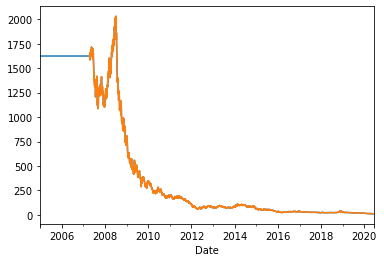

In [165]:
rebuild('GAS', 'ung_uns_ngas', pkl='prices_global.pkl').plot()
db['GAS'].plot()

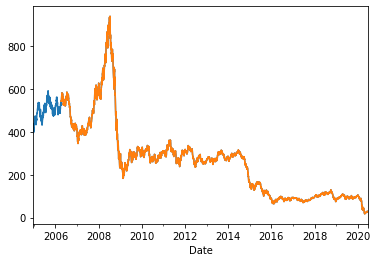

In [166]:
rebuild('WTI', 'uso_uns_wti', pkl='prices_global.pkl').plot()
db['WTI'].plot()

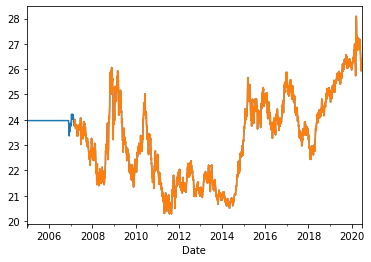

In [167]:
rebuild('USD', 'uup_pshares_usd_up', pkl='prices_global.pkl').plot()
db['USD'].plot()

In [6]:
db['KSP2'] = rebuild('KSP2', 'tiger200', pkl='prices_kr.pkl')
db['KTB-MID'] = rebuild('KTB-MID', 'kosef_ktb10y', pkl='prices_kr.pkl')
db['AAXJ'] = rebuild('AAXJ', 'aaxj_ishares_asia_xjp', pkl='prices_global.pkl')
db['ACWI'] = rebuild('ACWI', 'acwi_ishares_acwi', pkl='prices_global.pkl')
db['BRIC'] = rebuild('BRIC', 'bkf_ishares_bric', pkl='prices_global.pkl')
db['USBKLN'] = rebuild('USBKLN', 'bkln_pshares_us_bankloan', pkl='prices_global.pkl')
db['USCB'] = rebuild('USCB', 'cwb_spdr_us_cb', pkl='prices_global.pkl')
db['AGRI'] = rebuild('AGRI', 'dba_pshares_agriculture', pkl='prices_global.pkl')
db['BASEMETAL'] = rebuild('BASEMETAL', 'dbb_pshares_bmetal', pkl='prices_global.pkl')
db['COMDTY'] = rebuild('COMDTY', 'dbc_pshares_comdty', pkl='prices_global.pkl')
db['ENERGY'] = rebuild('ENERGY', 'dbe_pshares_energy', pkl='prices_global.pkl')
db['EMB'] = rebuild('EMB', 'emb_ishares_em_sov_usd', pkl='prices_global.pkl')
db['FRONTIER'] = rebuild('FRONTIER', 'fm_ishares_frontier', pkl='prices_global.pkl')
db['AUD'] = rebuild('AUD', 'fxa_cshares_aud', pkl='prices_global.pkl')
db['EUR'] = rebuild('EUR', 'fxe_cshares_eur', pkl='prices_global.pkl')
db['JPY'] = rebuild('JPY', 'fxy_cshares_jpy', pkl='prices_global.pkl')
db['PRECMETAL'] = rebuild('PRECMETAL', 'gltr_etfs_pmetal', pkl='prices_global.pkl')
db['MIDEAST'] = rebuild('MIDEAST', 'gulf_wisdomtree_middle_east', pkl='prices_global.pkl')
db['SMALLCAP'] = rebuild('SMALLCAP', 'gwx_spdr_intl_smallcap', pkl='prices_global.pkl')
db['USHY'] = rebuild('USHY', 'hyg_ishares_us_hy', pkl='prices_global.pkl')
db['INDIA'] = rebuild('INDIA', 'inda_ishares_india', pkl='prices_global.pkl')
db['USMBS'] = rebuild('USMBS', 'mbb_ishares_us_mbs', pkl='prices_global.pkl')
db['CN'] = rebuild('CN', 'mchi_ishares_china', pkl='prices_global.pkl')
db['USPFF'] = rebuild('USPFF', 'pff_ishares_us_pref', pkl='prices_global.pkl')
db['US-MREIT'] = rebuild('US-MREIT', 'rem_ishares_us_mortgage_reit', pkl='prices_global.pkl')
db['SILVER'] = rebuild('SILVER', 'slv_ishares_silver', pkl='prices_global.pkl')
db['GAS'] = rebuild('GAS', 'ung_uns_ngas', pkl='prices_global.pkl')
db['WTI'] = rebuild('WTI', 'uso_uns_wti', pkl='prices_global.pkl')
db['USD'] = rebuild('USD', 'uup_pshares_usd_up', pkl='prices_global.pkl')

In [26]:
db.to_pickle('db 20200619.pkl')

# 여기서부터 시작

In [3]:
db = pd.read_pickle('db 20200619.pkl')

In [4]:
dates = db.index[250*5-1:-250:5]; dates

DatetimeIndex(['2009-10-02', '2009-10-09', '2009-10-16', '2009-10-23',
               '2009-10-30', '2009-11-06', '2009-11-13', '2009-11-20',
               '2009-11-27', '2009-12-04',
               ...
               '2019-05-03', '2019-05-10', '2019-05-17', '2019-05-24',
               '2019-05-31', '2019-06-07', '2019-06-14', '2019-06-21',
               '2019-06-28', '2019-07-05'],
              dtype='datetime64[ns]', name='Date', length=510, freq='5B')

In [7]:
nback = 250*5
date = dates[-1]
db_ = db.loc[:date].iloc[-nback:]
# reducer = FastICA(n_components=3, random_state=0)
pricer = pr.Pricer(db_, reducer=None, prob=0.80, howfar=250, progress=False)

In [8]:
nfwds = [5,10,15,20,40,60,80,100,120,140,160,180,200,220,240]

def evaluate_relperf(pricer):
    r_actual = db.loc[pricer.asof:].iloc[[0]+nfwds]
    r_actual = (r_actual / r_actual.iloc[0] - 1).iloc[1:]
    r_actual.index = nfwds
    r_forecast = pd.DataFrame({nfwd:pricer.stats(nfwd=nfwd, up_thres=0.005).rband_fair for nfwd in nfwds}).T
    return r_actual.corrwith(r_forecast, axis=1)

In [9]:
evaluate_relperf(pricer)

5     -0.343807
10     0.254604
15    -0.492258
20     0.437500
40     0.551200
60     0.737593
80    -0.011577
100   -0.194555
120   -0.096033
140    0.312228
160    0.544140
180    0.183908
200    0.552451
220    0.588834
240    0.556858
dtype: float64

In [26]:
import asyncio
nback = 250*5

async def evalute(date):
    db_ = db.loc[:date].iloc[-nback:]
    pricer = await loop.run_in_executor(None, pr.Pricer, db_)
    print(date)
    return date, await loop.run_in_executor(None, evaluate_relperf, pricer)

async def main():
    fts = [asyncio.ensure_future(evalute(date)) for date in dates[:]]
    return await asyncio.gather(*fts)


result = None
asyncio.set_event_loop(asyncio.new_event_loop())
loop = asyncio.get_event_loop()

try:
    # 다음 코드를 주피터에서 돌리려면, tornado를 downgrade 해야함
    # pip install tornado==4.5.3
    result = loop.run_until_complete(main())
    result = pd.DataFrame(dict(result)).T

except Exception as ex:
    print(ex)

finally:
    loop.close()

2009-12-25 00:00:00
2009-10-30 00:00:00
2010-01-01 00:00:00
2010-01-22 00:00:00
2009-10-02 00:00:00
2009-11-27 00:00:00
2009-12-04 00:00:00
2010-01-29 00:00:00
2010-02-05 00:00:00
2009-12-11 00:00:00
2010-01-08 00:00:00
2009-10-16 00:00:00
2009-11-06 00:00:00
2010-02-12 00:00:00
2009-10-09 00:00:00
2009-11-13 00:00:00
2009-12-18 00:00:00
2010-01-15 00:00:00
2009-11-20 00:00:00
2009-10-23 00:00:00
2010-02-19 00:00:00
2010-03-12 00:00:00
2010-02-26 00:00:00
2010-03-19 00:00:00
2010-03-05 00:00:00
2010-04-16 00:00:00
2010-03-26 00:00:00
2010-04-02 00:00:00
2010-05-07 00:00:00
2010-04-09 00:00:00
2010-04-30 00:00:00
2010-04-23 00:00:00
2010-05-14 00:00:00
2010-05-28 00:00:00
2010-05-21 00:00:00
2010-06-11 00:00:00
2010-06-04 00:00:00
2010-06-25 00:00:00
2010-06-18 00:00:00
2010-07-02 00:00:00
2010-07-09 00:00:00
2010-07-23 00:00:00
2010-07-16 00:00:00
2010-07-30 00:00:00
2010-08-06 00:00:00
2010-08-13 00:00:00
2010-08-20 00:00:00
2010-08-27 00:00:00
2010-09-17 00:00:00
2010-09-24 00:00:00


2017-08-04 00:00:00
2017-08-11 00:00:00
2017-08-18 00:00:00
2017-08-25 00:00:00
2017-09-01 00:00:00
2017-09-08 00:00:00
2017-09-15 00:00:00
2017-09-22 00:00:00
2017-09-29 00:00:00
2017-10-06 00:00:00
2017-10-13 00:00:00
2017-10-20 00:00:00
2017-10-27 00:00:00
2017-11-03 00:00:00
2017-11-10 00:00:00
2017-11-17 00:00:00
2017-12-08 00:00:00
2017-11-24 00:00:00
2017-12-01 00:00:00
2017-12-22 00:00:00
2017-12-15 00:00:00
2017-12-29 00:00:00
2018-01-05 00:00:00
2018-01-12 00:00:00
2018-01-19 00:00:00
2018-01-26 00:00:00
2018-02-02 00:00:00
2018-02-09 00:00:00
2018-02-16 00:00:00
2018-02-23 00:00:00
2018-03-02 00:00:00
2018-03-09 00:00:00
2018-03-16 00:00:00
2018-03-23 00:00:00
2018-03-30 00:00:00
2018-04-06 00:00:00
2018-04-13 00:00:00
2018-04-27 00:00:00
2018-04-20 00:00:00
2018-05-04 00:00:00
2018-05-11 00:00:00
2018-05-18 00:00:00
2018-05-25 00:00:00
2018-06-15 00:00:00
2018-06-01 00:00:00
2018-06-08 00:00:00
2018-06-22 00:00:00
2018-06-29 00:00:00
2018-07-06 00:00:00
2018-07-13 00:00:00


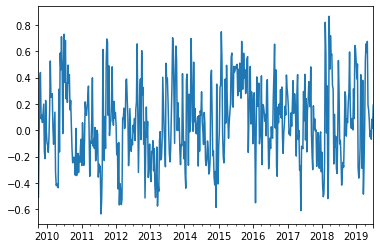

In [32]:
result[[5,10,15,20,40,60]].mean(axis=1).plot()

In [33]:
result.to_pickle('result.pkl')

In [58]:
kk = False
for jj in (range(5) if kk else range(3)):
    print(jj)

0
1
2


In [118]:
def cal_hit():
    hits = []
    for i, nfwd in list(enumerate(nfwds))[1:]:
        forecast = pricer.stats(nfwd=nfwd, up_thres=0.01)
        actual = df.iloc[i]
        #hit = dir_actual * dir_forecast > 0
        #hits.append((nfwd, hit.sum() / len(hit)))
        hits.append((nfwd, actual.corr(forecast.rband_fair)))
        
    return hits

In [119]:
cal_hit()

[(5, 0.4587860636812362),
 (10, -0.5323863816203396),
 (15, 0.5538399041533946),
 (20, -0.5989687090310699),
 (40, -0.5406484852584688),
 (60, -0.3374884127769239),
 (80, 0.22819751012790343),
 (100, 0.30337596438527525),
 (120, 0.6445786632159642),
 (140, 0.627167799915445),
 (160, 0.4810250197861885),
 (180, -0.6509773273411951),
 (200, -0.48066130015966035),
 (220, -0.31227124851051014),
 (240, -0.12807304537028918)]

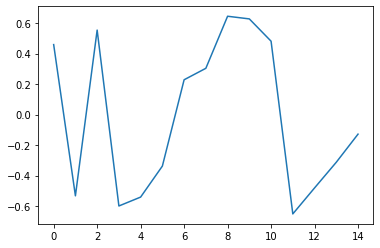

In [98]:
pd.Series(list(zip(*cal_hit()))[1]).plot()

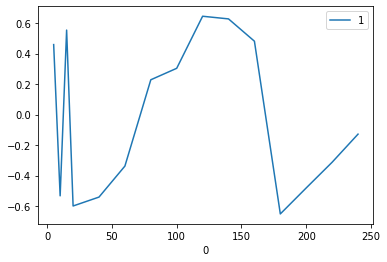

In [102]:
pd.DataFrame(cal_hit()).set_index(0).plot()